Using OLS for sales forecast:

Using OLS regression, this code predicts a three-month forecast of future sales based on historical sales data from Brazilian e-commerce. The code first filters the orders by date and then converts the dates to period format. The code then aggregates the monthly sales and calculates the growth rate. The code fits an OLS model and computes the forecast after defining the dependent and independent variables. Finally, the code displays the plot of historical and forecasted sales data.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Load orders and order items datasets
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')

# Merge orders and order items
orders = pd.merge(orders, order_items, on='order_id')

# Convert date columns to datetime format
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])

# Filter orders by date
orders = orders.loc[(orders['order_approved_at'] >= '2017-01-07') & (orders['order_approved_at'] <= '2018-08-17')]

# Compute order price
orders['price'] = orders['price'] * orders['order_item_id']

# Convert dates to period format
orders['order_month'] = orders['order_approved_at'].dt.to_period('M')

# Aggregate monthly sales
monthly_sales = orders.groupby('order_month')['price'].sum()

# Compute growth rate
monthly_growth = monthly_sales.pct_change()

In [3]:
# Remove first row with NaN value
monthly_growth = monthly_growth.dropna()

# Define dependent and independent variables
X = sm.add_constant(monthly_growth.values[:-1])
y = monthly_growth.values[1:]

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                   0.04929
Date:                Sun, 19 Mar 2023   Prob (F-statistic):              0.827
Time:                        15:48:46   Log-Likelihood:                 1.3470
No. Observations:                  18   AIC:                             1.306
Df Residuals:                      16   BIC:                             3.087
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0730      0.063      1.157      0.2

/Users/derek/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Findings:

* The p-value for the independent variable is 0.827, which is not statistically significant at the 5% level.

* The adjusted R-squared value is  -0.059, which adjusts for the number of independent variables in the model and penalizes models with additional variables that do not improve the fit. Note: A negative adjusted R-squared indicates that the model is not a good fit for the data

* The F-statistic measures the overall fit of the model, with larger values indicating a better fit. The p-value for the F-statistic is 0.04929, indicating that the model does not provide a significantly better fit than a model with no independent variables.

* Overall, the OLS model in this code suggests that the monthly growth rate does not have a statistically significant effect on the three-month sales forecast. Therefore, it may not be an accurate predictor of future sales.

In [4]:
# Compute forecast
forecast = results.predict([1, monthly_growth[-1]])

# Print forecast
print('Three-month sales forecast: {:.2f}'.format(monthly_sales[-1] * (1 + forecast[0])**3))

Three-month sales forecast: 858453.26


Findings based on the three-month sales forecast:

* The three-month sales forecast is a prediction of what the sales amount is expected to be over the next three months, based on the statistical analysis performed on the historical data. 
* In this case, the forecast is for a sales amount of 858453.26, which is the predicted sales for the next three months after the end of the historical data.

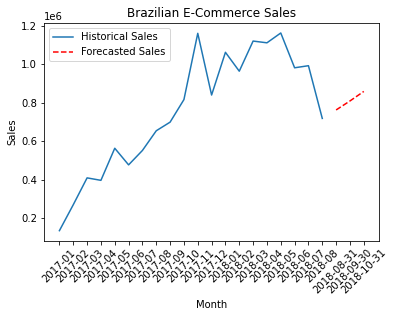

In [5]:
# Plot the historical sales data
plt.plot(monthly_sales.index.astype(str), monthly_sales.values)

# Plot the forecasted sales
forecast_dates = pd.period_range(start=monthly_sales.index[-1], periods=3, freq='M').strftime('%Y-%m-%d')
plt.plot(forecast_dates, monthly_sales[-1] * (1 + forecast)**np.arange(1,4), 'r--')

# Set plot title and labels
plt.title('Brazilian E-Commerce Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(['Historical Sales', 'Forecasted Sales'])

# Adjust figure size and x-axis labels
plt.rcParams['figure.figsize'] = [10, 5]
plt.xticks(rotation=45)

# Show the plot
plt.show()